<a href="https://colab.research.google.com/github/talrab1999/titanic-survival-prediction/blob/main/titanic_survival_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
df['Survived2'] = df['Survived']

In [ ]:
df = df.drop(columns= ['Survived'])

In [ ]:
df = df.rename(columns={"Survived2": "Survived"})

In [ ]:
df.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [ ]:
sex_map = {'female': 0, 'male': 1}
df['Sex'] = df['Sex'].map(sex_map)
df = df.drop(columns= ['Name'])

In [ ]:
df.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch            Ticket     Fare  \
0            1       3    1  22.0      1      0         A/5 21171   7.2500   
1            2       1    0  38.0      1      0          PC 17599  71.2833   
2            3       3    0  26.0      0      0  STON/O2. 3101282   7.9250   
3            4       1    0  35.0      1      0            113803  53.1000   
4            5       3    1  35.0      0      0            373450   8.0500   

  Cabin Embarked  Survived  
0   NaN        S         0  
1   C85        C         1  
2   NaN        S         1  
3  C123        S         1  
4   NaN        S         0

In [ ]:
df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [ ]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df = df.drop(columns= ['Cabin'])
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
embark_map = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(embark_map)

In [ ]:
df.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch            Ticket     Fare  \
0            1       3    1  22.0      1      0         A/5 21171   7.2500   
1            2       1    0  38.0      1      0          PC 17599  71.2833   
2            3       3    0  26.0      0      0  STON/O2. 3101282   7.9250   
3            4       1    0  35.0      1      0            113803  53.1000   
4            5       3    1  35.0      0      0            373450   8.0500   

   Embarked  Survived  
0       0.0         0  
1       1.0         1  
2       0.0         1  
3       0.0         1  
4       0.0         0

In [ ]:
df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].median())
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [ ]:
df.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked       float64
Survived         int64
dtype: object

In [ ]:
df = df.drop(columns= ['Ticket'])

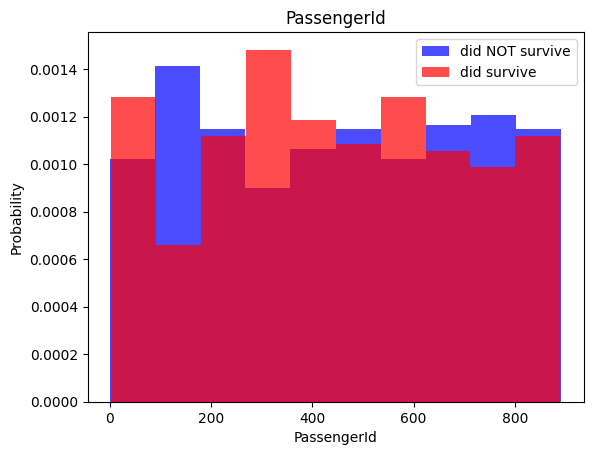

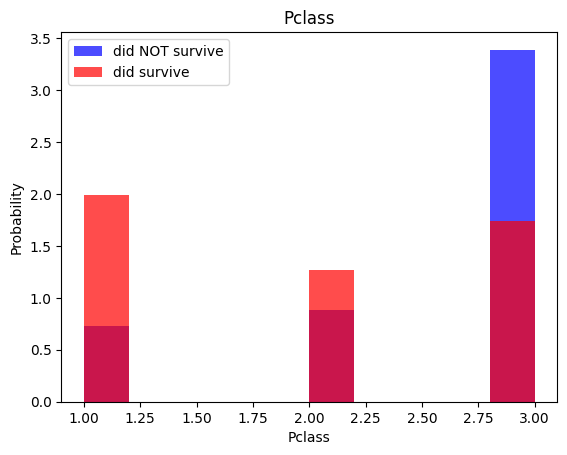

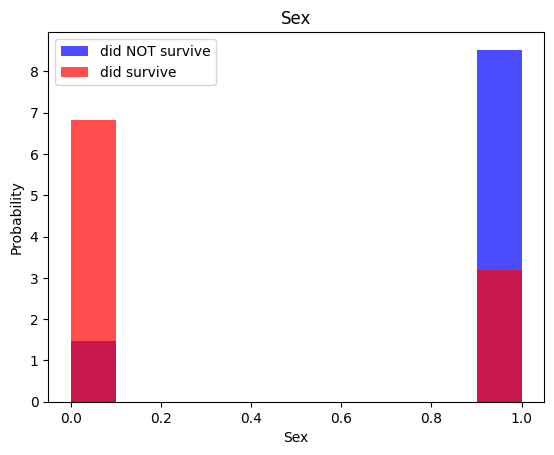

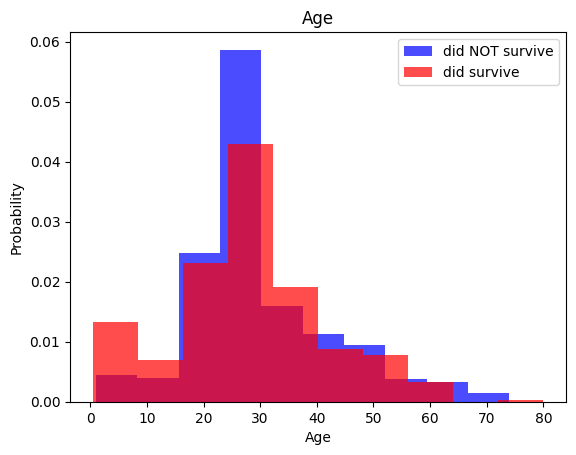

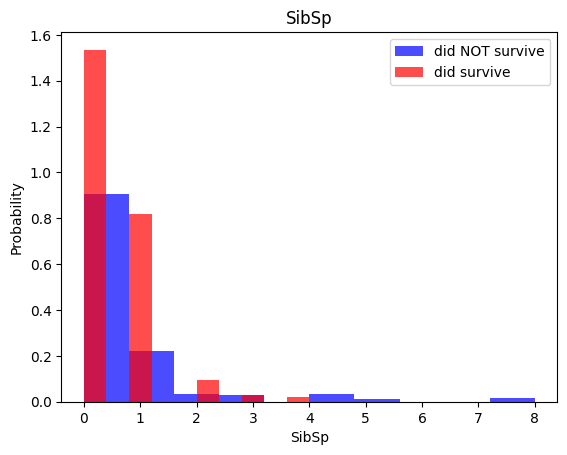

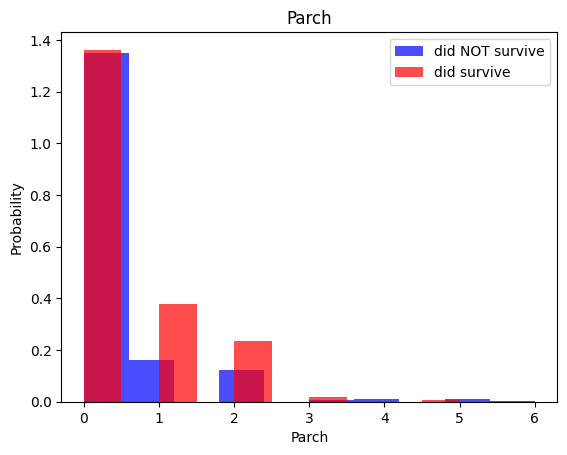

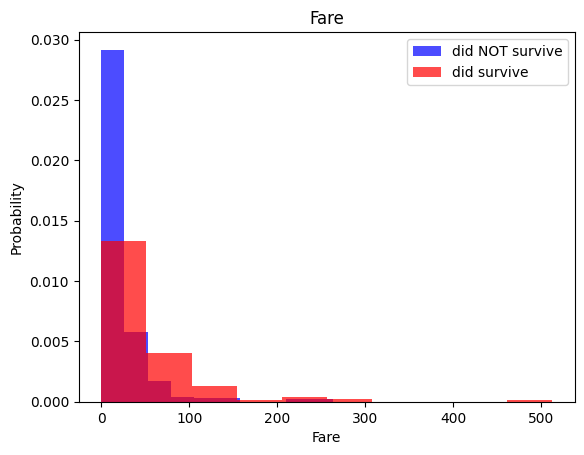

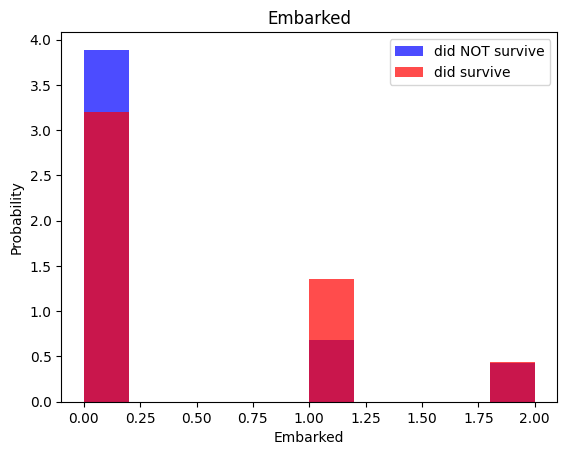

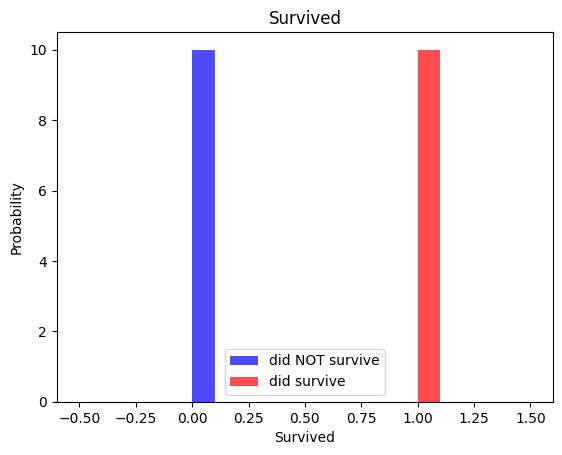

In [ ]:
for label in df.columns:
  plt.hist(df[df['Survived'] == 0][label], color = 'blue', label='did NOT survive', alpha = 0.7, density= True)
  plt.hist(df[df['Survived'] == 1][label], color = 'red', label='did survive', alpha = 0.7, density= True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
df = df.drop(columns= ['PassengerId'])

In [ ]:
def scale_dataset(df, oversample = False):
  X = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [ ]:
len(df[df['Survived'] == 0])

549

In [ ]:
len(df[df['Survived'] == 1])

342

Decided it's fine to not oversample, but might be worth to do so

In [ ]:
train, X_train, y_train = scale_dataset(df)

#Setting up the test file

In [ ]:
dftest = pd.read_csv("test.csv")
dftestsur = pd.read_csv('gender_submission.csv')

In [ ]:
dftestsur.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [ ]:
dftest['Survived'] = dftestsur['Survived']

In [ ]:
dftest.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1

In [ ]:
dftest['Sex'] = dftest['Sex'].map(sex_map)
dftest = dftest.drop(columns= ['Name'])
dftest['Embarked'] = dftest['Embarked'].map(embark_map)
dftest = dftest.drop(columns= ['Ticket'])
dftest = dftest.drop(columns= ['PassengerId'])

In [ ]:
dftest.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
Survived      0
dtype: int64

In [ ]:
dftest = dftest.drop(columns= ['Cabin'])
dftest['Age'] = dftest['Age'].fillna(dftest['Age'].mean())
dftest['Fare'] = dftest['Fare'].fillna(dftest['Fare'].mean())

In [ ]:
dftest.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [ ]:
test, X_test, y_test = scale_dataset(dftest)

#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()

In [ ]:
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       266
           1       0.92      0.78      0.84       152

    accuracy                           0.89       418
   macro avg       0.90      0.87      0.88       418
weighted avg       0.90      0.89      0.89       418



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

In [ ]:
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
gs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                                random_grid,
                                cv=cross_validation,
                                verbose=1,
                                n_jobs=-1,
                                scoring='accuracy')

In [ ]:
gs_rfc = gs_rfc.fit(X_train, y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


In [ ]:
y_pred = gs_rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       266
           1       0.84      0.70      0.76       152

    accuracy                           0.84       418
   macro avg       0.84      0.81      0.82       418
weighted avg       0.84      0.84      0.84       418



probably can get better results with different parameters

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors= 19)
knn_model = knn_model.fit(X_train,y_train)

y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       266
           1       0.89      0.88      0.88       152

    accuracy                           0.92       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.92      0.92      0.92       418



best results for 19 neighbors

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_reg_model = LogisticRegression()
logistic_reg_model = logistic_reg_model.fit(X_train,y_train)

y_pred = logistic_reg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       266
           1       0.93      0.90      0.91       152

    accuracy                           0.94       418
   macro avg       0.94      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       266
           1       0.87      0.94      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.92       418
weighted avg       0.93      0.93      0.93       418



#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg_model = GaussianNB()
linear_reg_model = linear_reg_model.fit(X_train,y_train)

y_pred = linear_reg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       266
           1       0.87      0.94      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.92       418
weighted avg       0.93      0.93      0.93       418



#NN tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Sparse Categorical Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation= 'relu', input_shape = (X_train.shape[1],)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation= 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
  history = nn_model.fit(
      X_train, y_train, epochs = epochs, batch_size= batch_size, validation_split = 0.2, verbose = 0
      )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


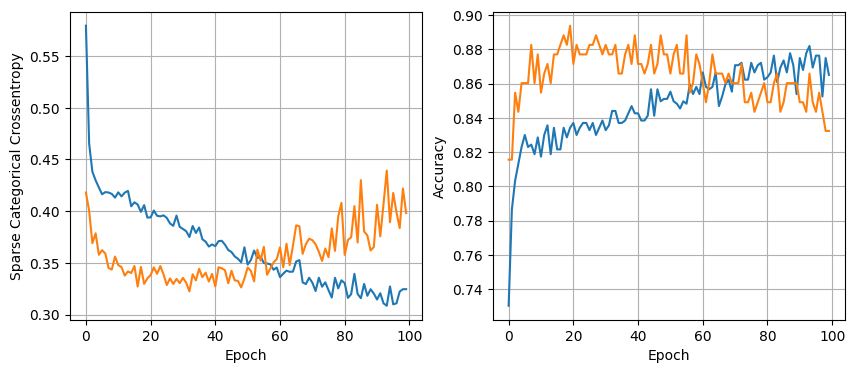

16 nodes, dropout 0, lr 0.01, batch size 64


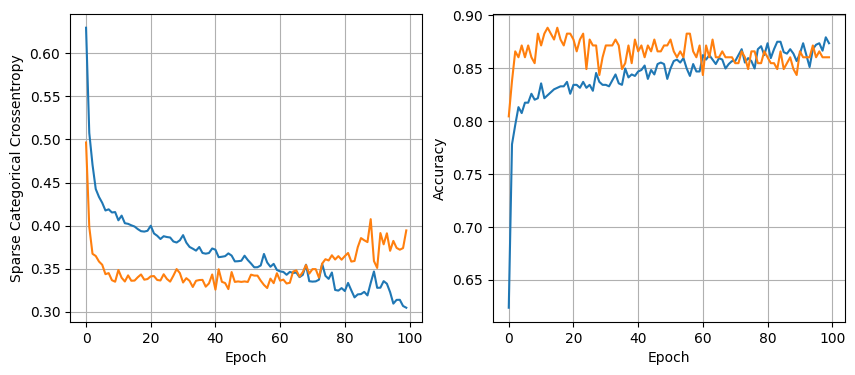

16 nodes, dropout 0, lr 0.01, batch size 128


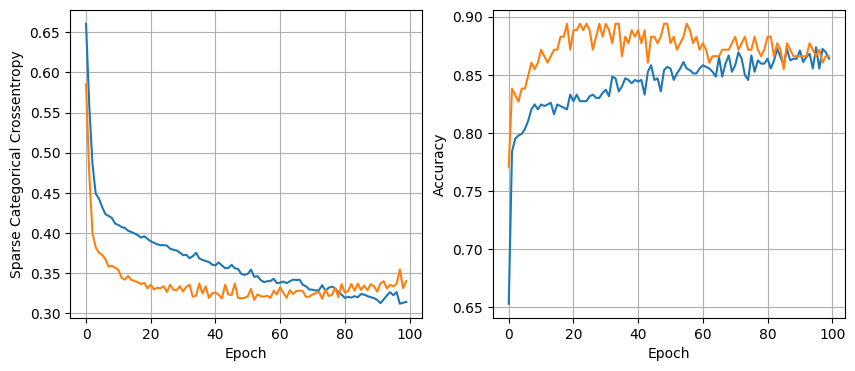

16 nodes, dropout 0, lr 0.005, batch size 32


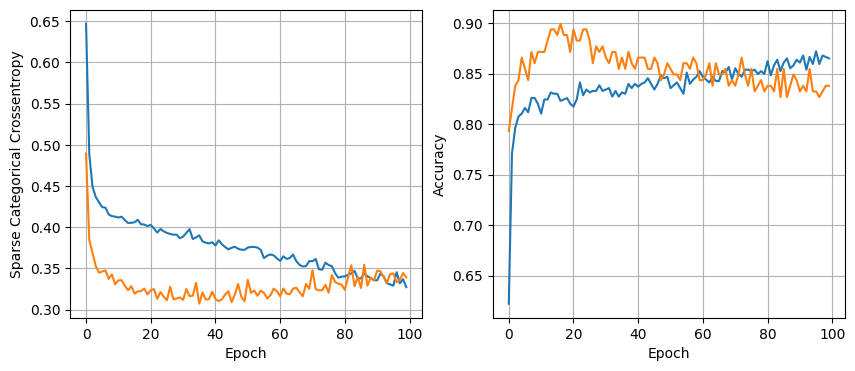

16 nodes, dropout 0, lr 0.005, batch size 64


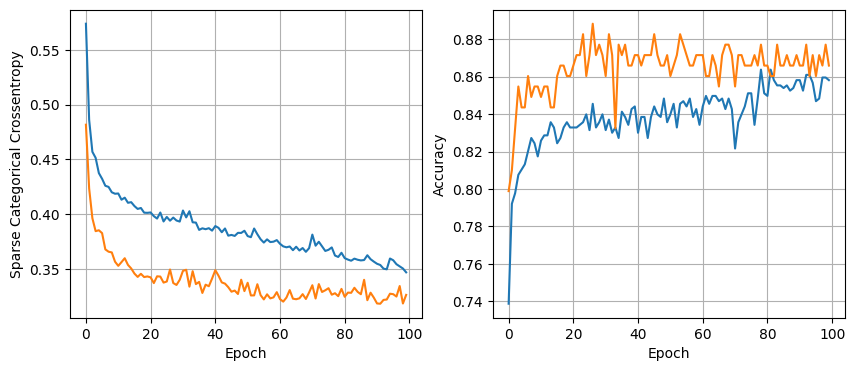

16 nodes, dropout 0, lr 0.005, batch size 128


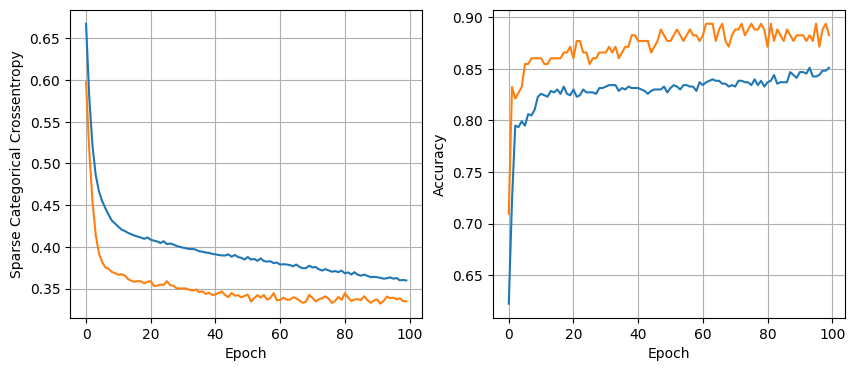

16 nodes, dropout 0, lr 0.001, batch size 32


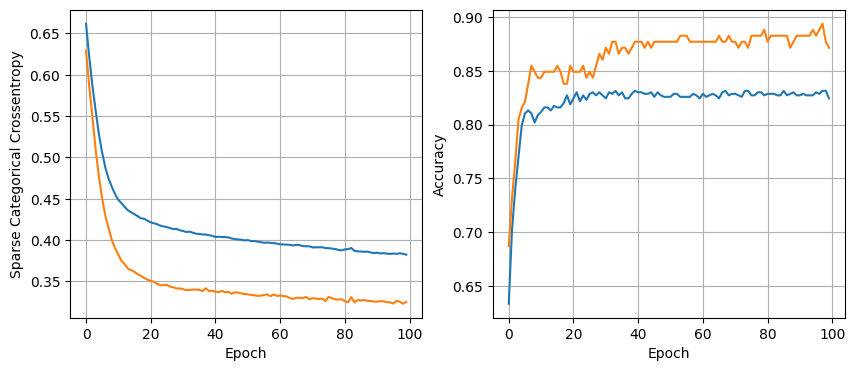

16 nodes, dropout 0, lr 0.001, batch size 64


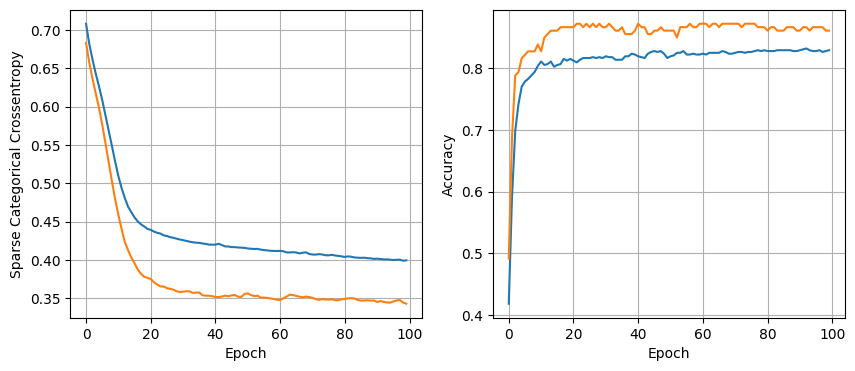

16 nodes, dropout 0, lr 0.001, batch size 128


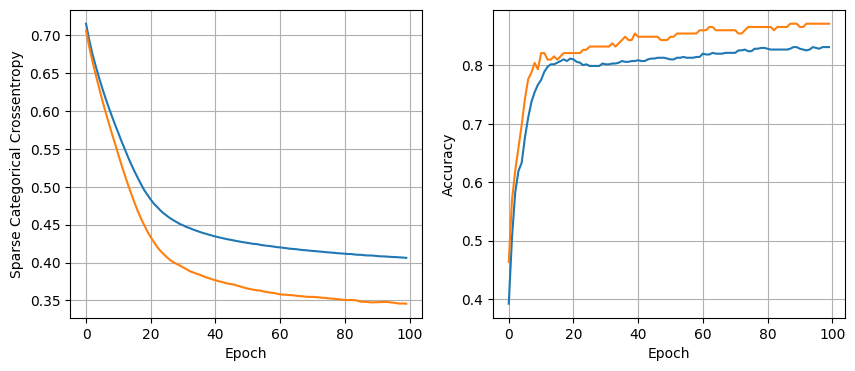

16 nodes, dropout 0.2, lr 0.01, batch size 32


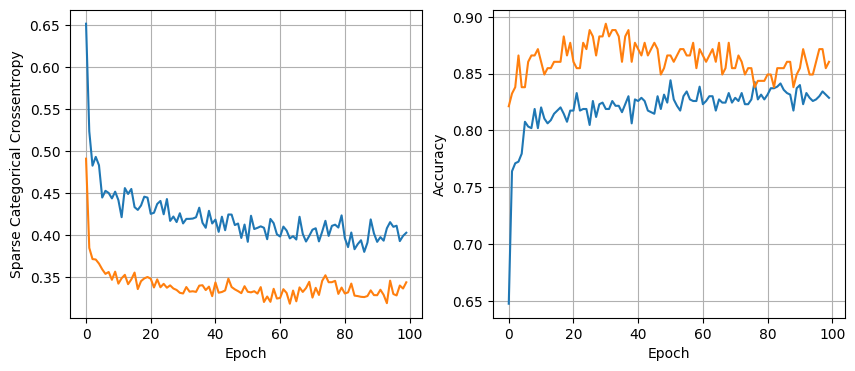

16 nodes, dropout 0.2, lr 0.01, batch size 64


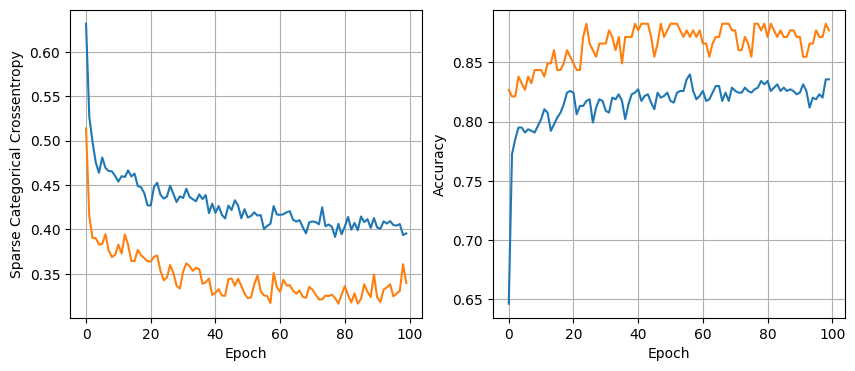

16 nodes, dropout 0.2, lr 0.01, batch size 128


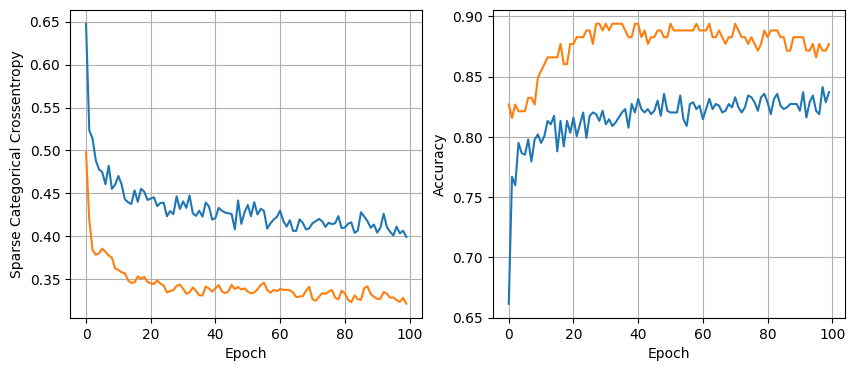

16 nodes, dropout 0.2, lr 0.005, batch size 32


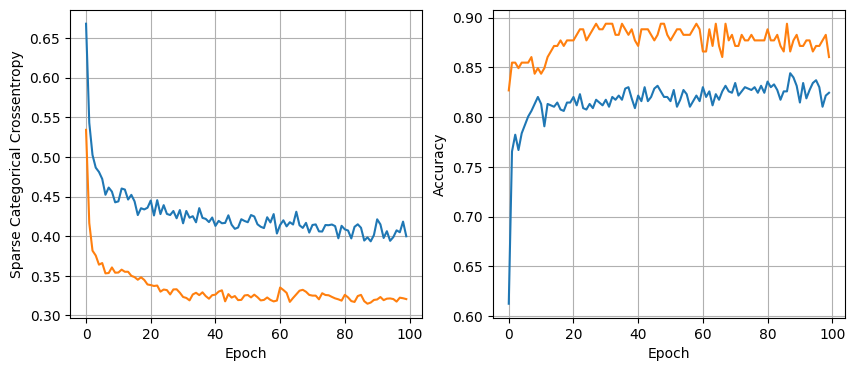

16 nodes, dropout 0.2, lr 0.005, batch size 64


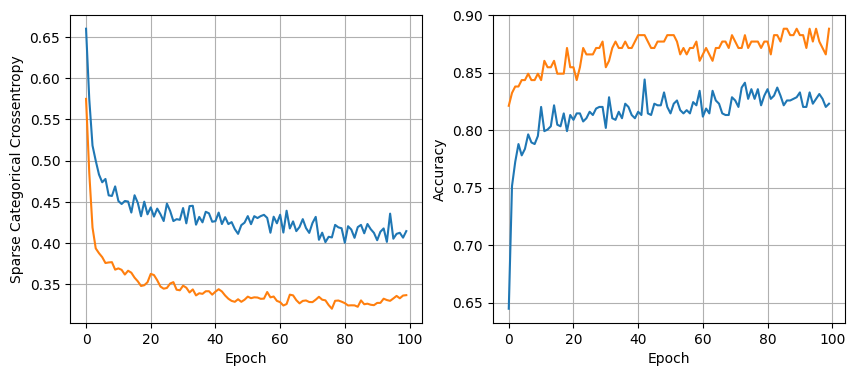

16 nodes, dropout 0.2, lr 0.005, batch size 128


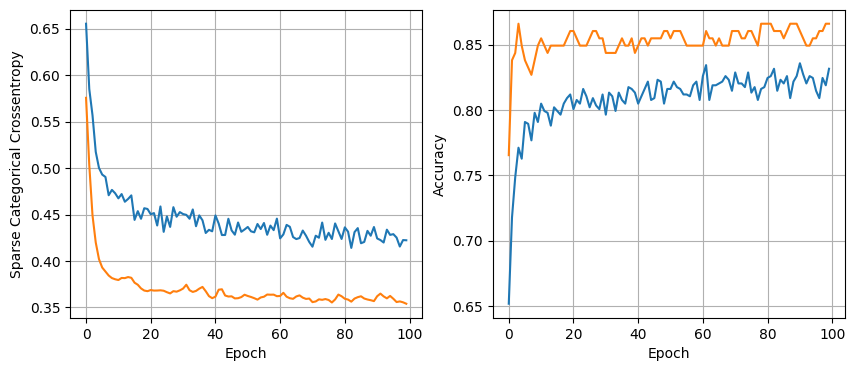

16 nodes, dropout 0.2, lr 0.001, batch size 32


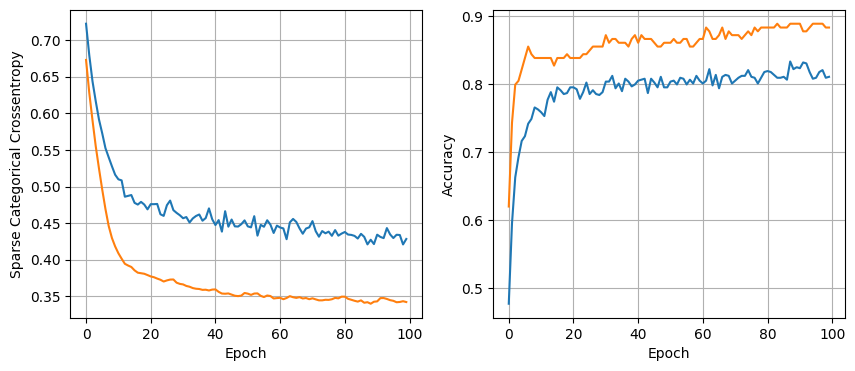

16 nodes, dropout 0.2, lr 0.001, batch size 64


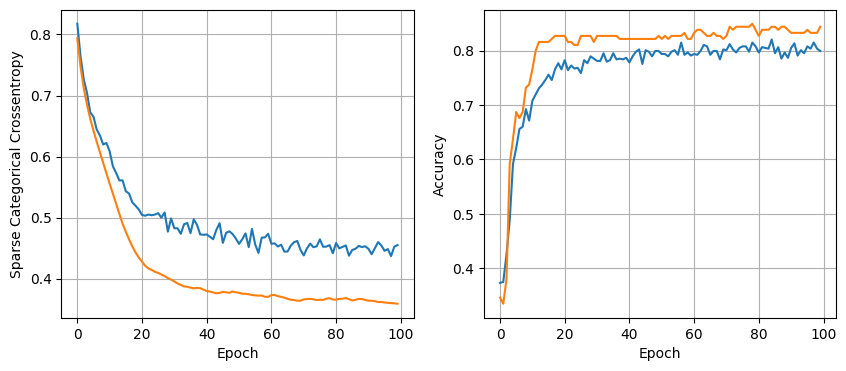

16 nodes, dropout 0.2, lr 0.001, batch size 128


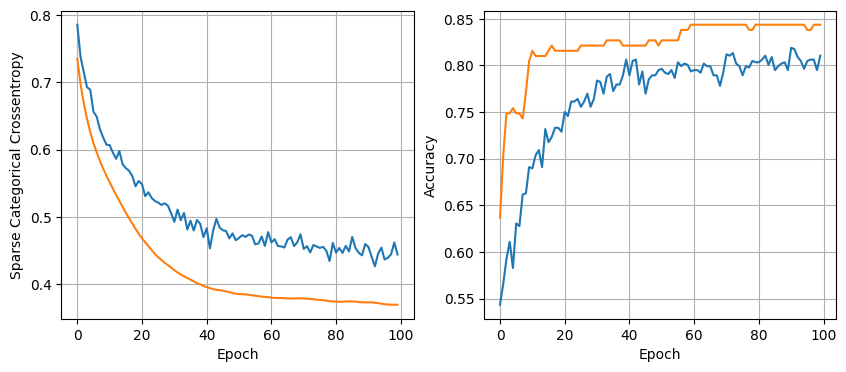

32 nodes, dropout 0, lr 0.01, batch size 32


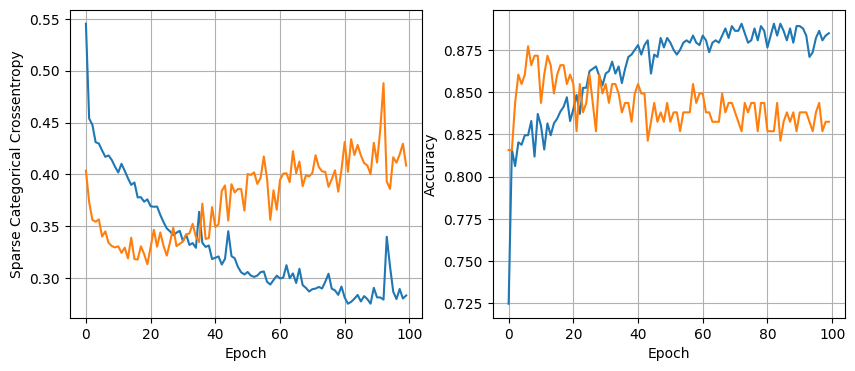

32 nodes, dropout 0, lr 0.01, batch size 64


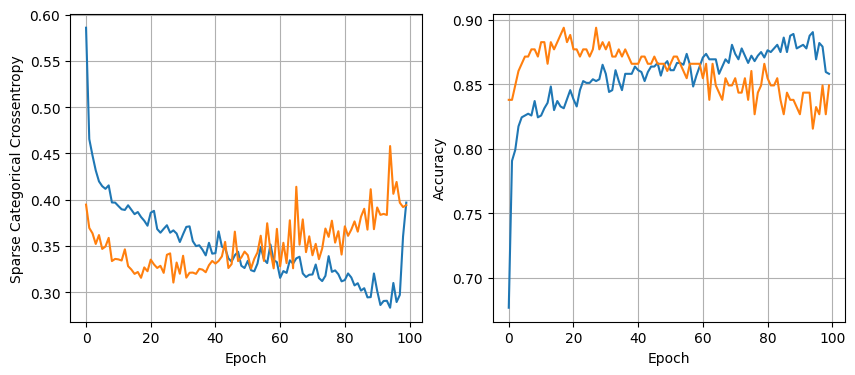

32 nodes, dropout 0, lr 0.01, batch size 128


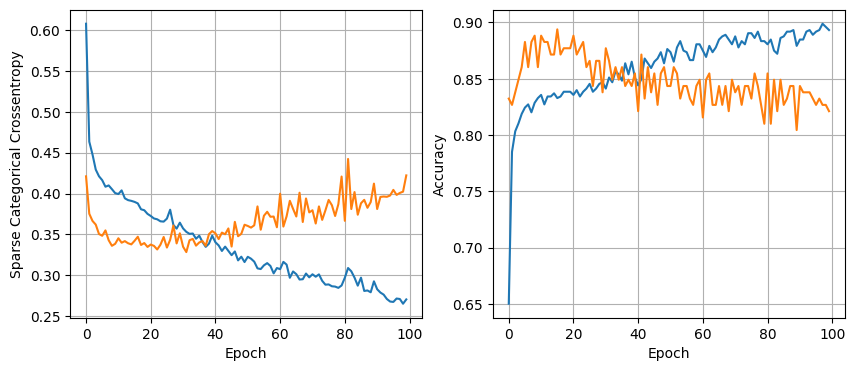

32 nodes, dropout 0, lr 0.005, batch size 32


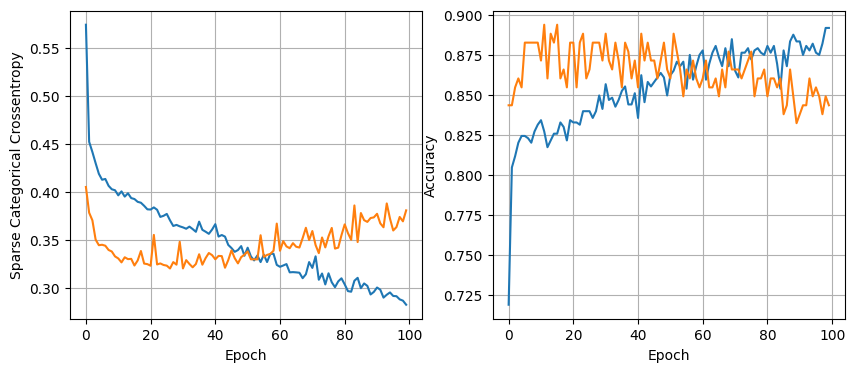

32 nodes, dropout 0, lr 0.005, batch size 64


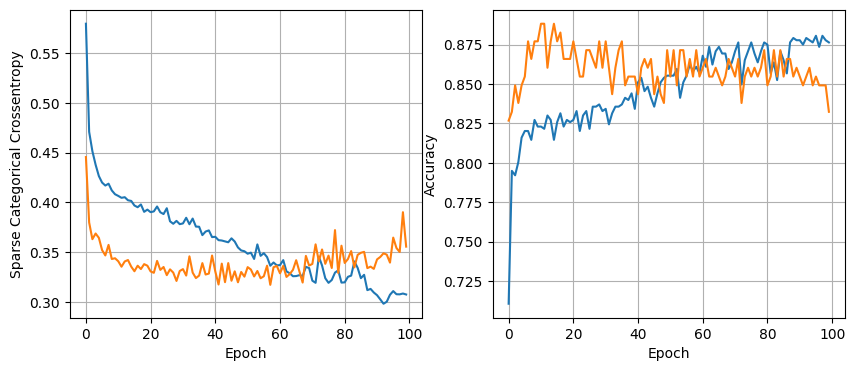

32 nodes, dropout 0, lr 0.005, batch size 128


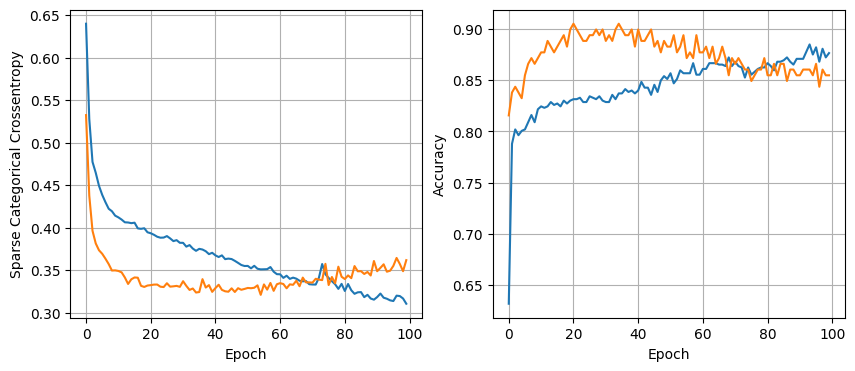

32 nodes, dropout 0, lr 0.001, batch size 32


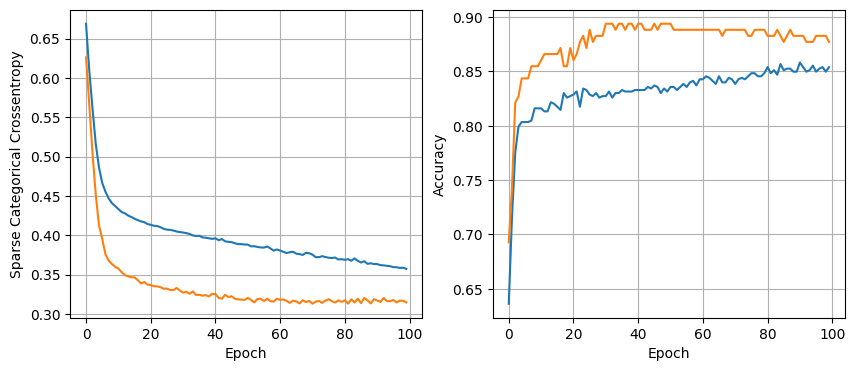

32 nodes, dropout 0, lr 0.001, batch size 64


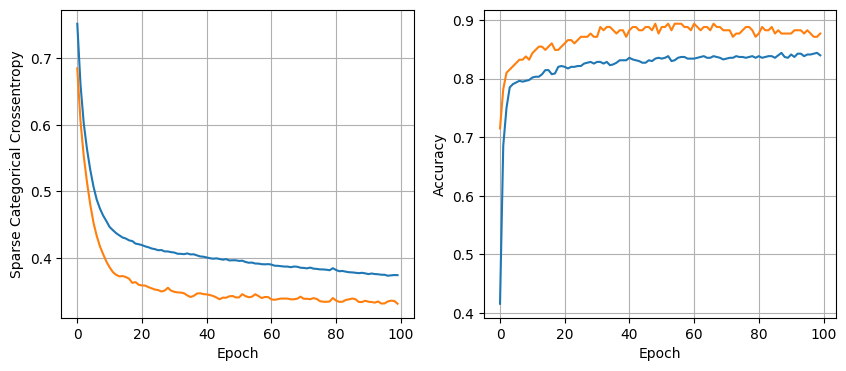

32 nodes, dropout 0, lr 0.001, batch size 128


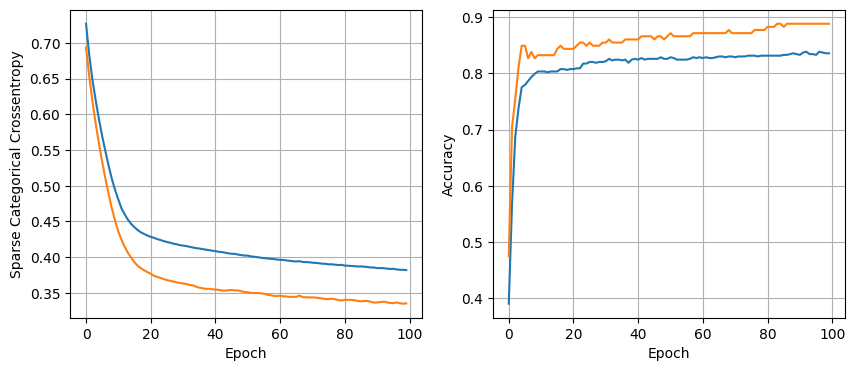

32 nodes, dropout 0.2, lr 0.01, batch size 32


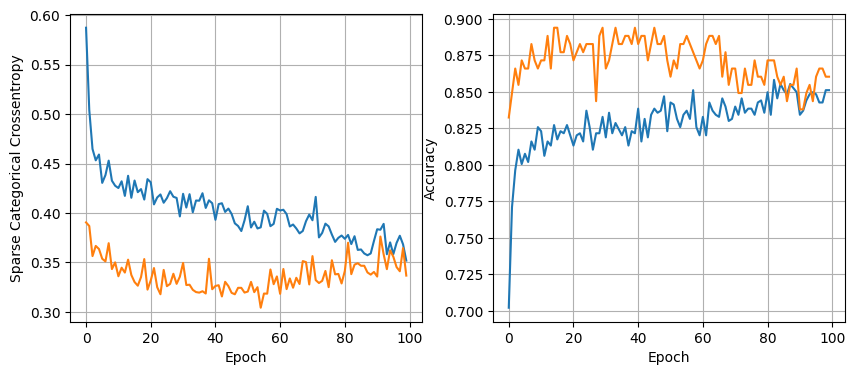

32 nodes, dropout 0.2, lr 0.01, batch size 64


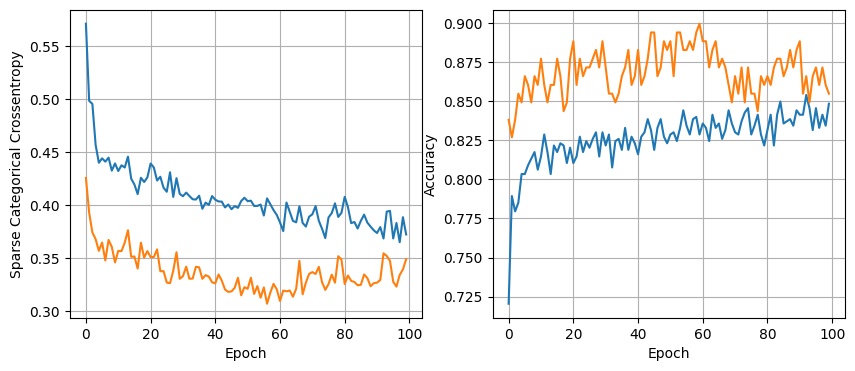

32 nodes, dropout 0.2, lr 0.01, batch size 128


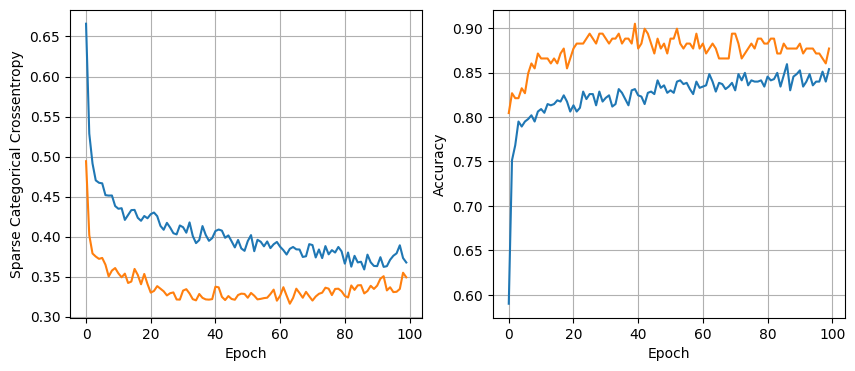

32 nodes, dropout 0.2, lr 0.005, batch size 32


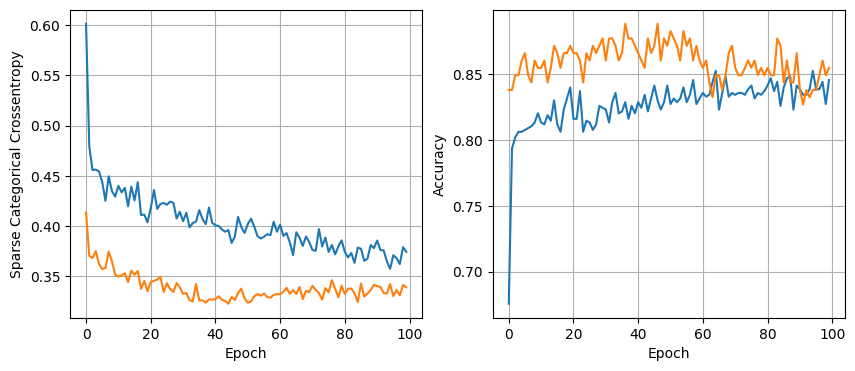

32 nodes, dropout 0.2, lr 0.005, batch size 64


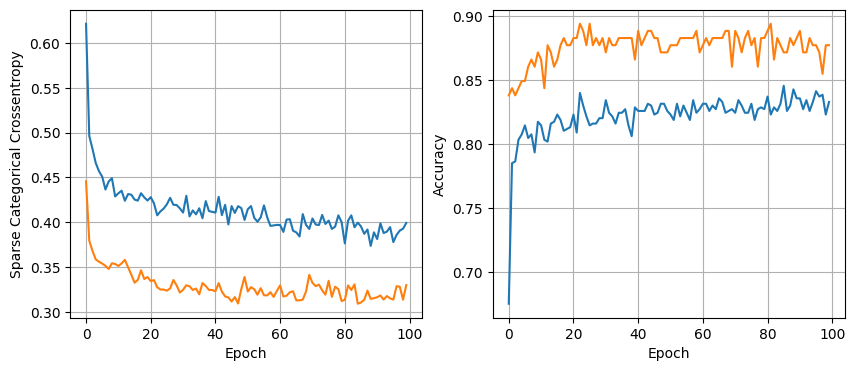

32 nodes, dropout 0.2, lr 0.005, batch size 128


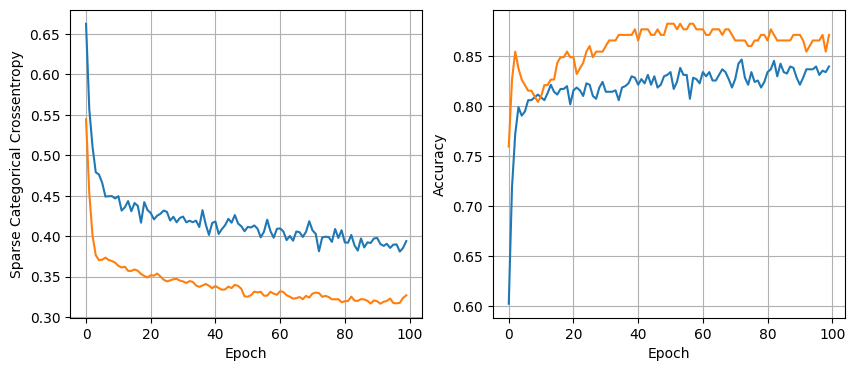

32 nodes, dropout 0.2, lr 0.001, batch size 32


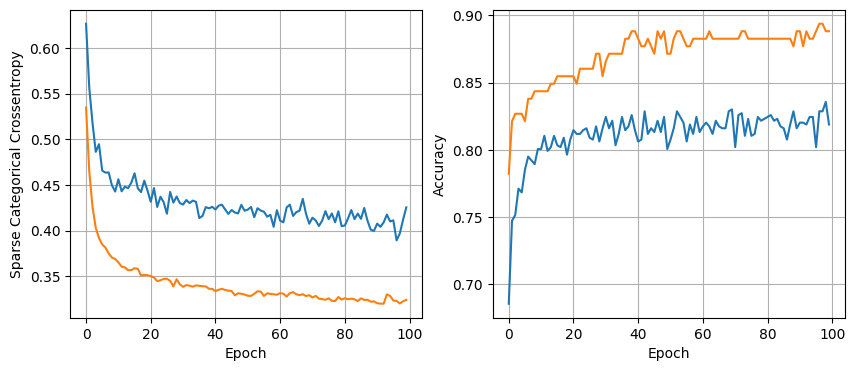

32 nodes, dropout 0.2, lr 0.001, batch size 64


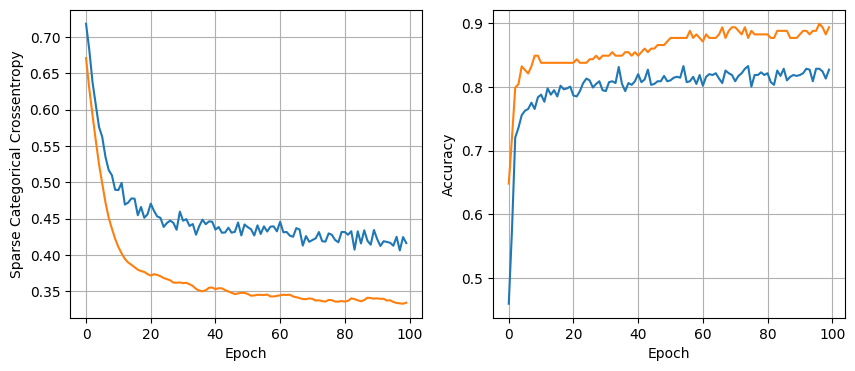

32 nodes, dropout 0.2, lr 0.001, batch size 128


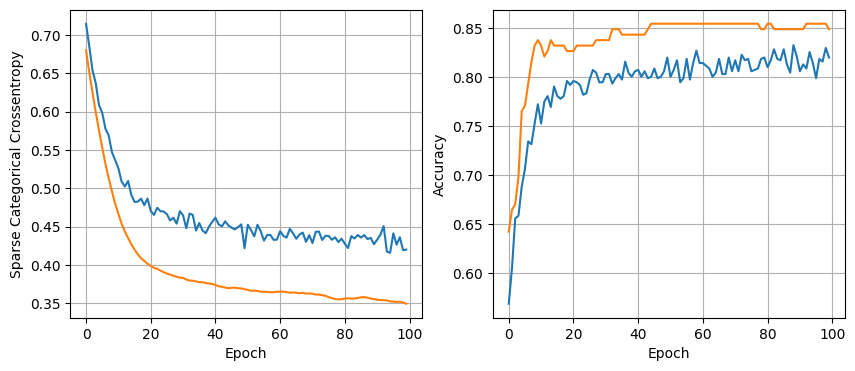

64 nodes, dropout 0, lr 0.01, batch size 32


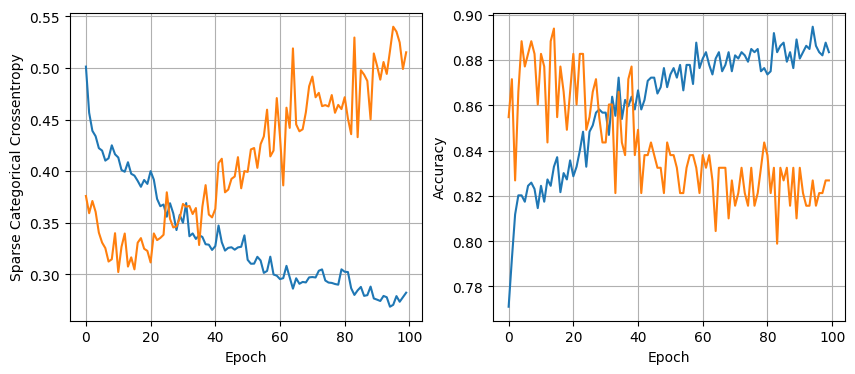

64 nodes, dropout 0, lr 0.01, batch size 64


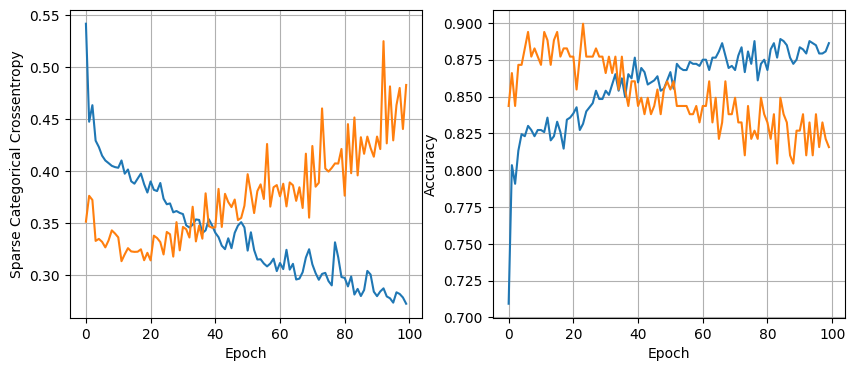

64 nodes, dropout 0, lr 0.01, batch size 128


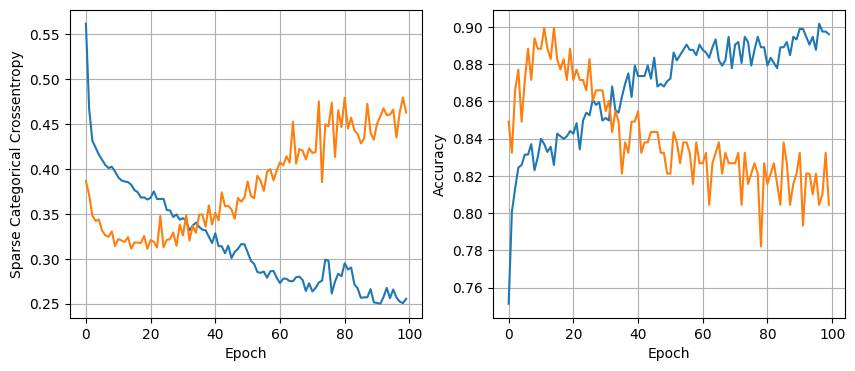

64 nodes, dropout 0, lr 0.005, batch size 32


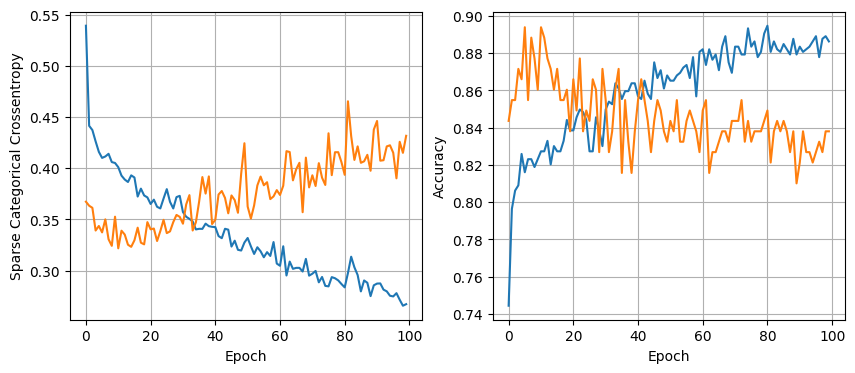

64 nodes, dropout 0, lr 0.005, batch size 64


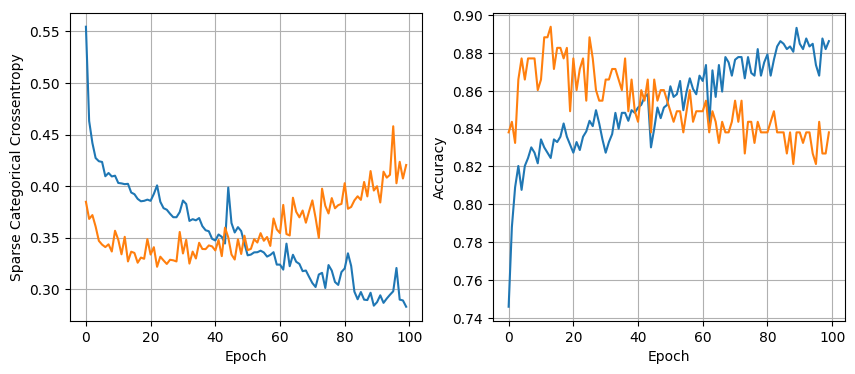

64 nodes, dropout 0, lr 0.005, batch size 128


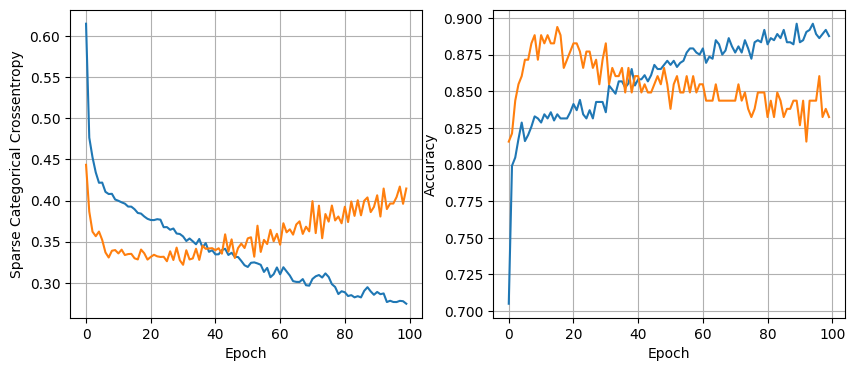

64 nodes, dropout 0, lr 0.001, batch size 32


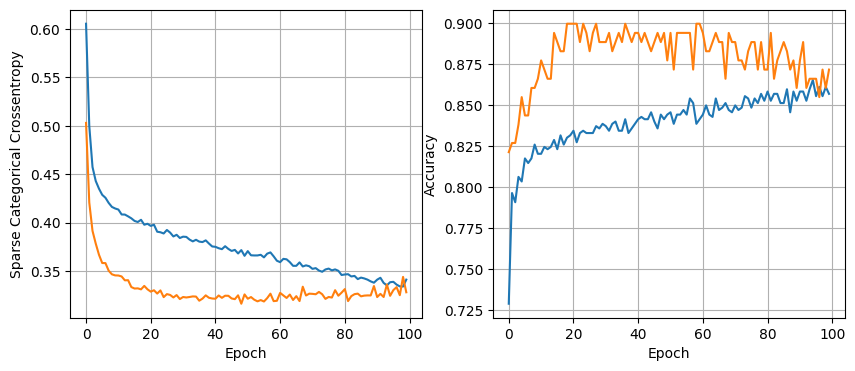

64 nodes, dropout 0, lr 0.001, batch size 64


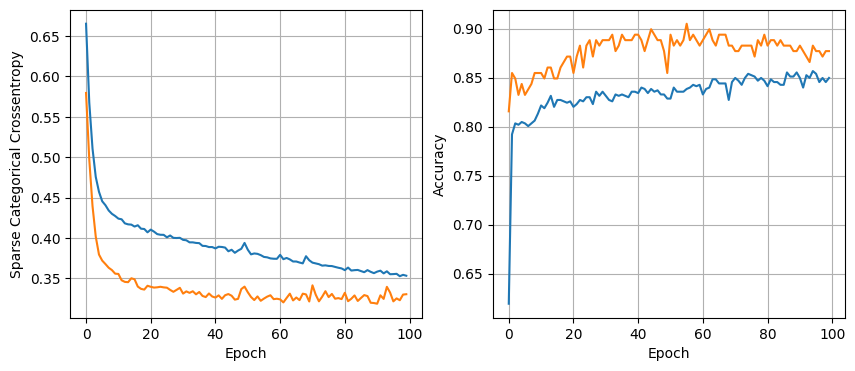

64 nodes, dropout 0, lr 0.001, batch size 128


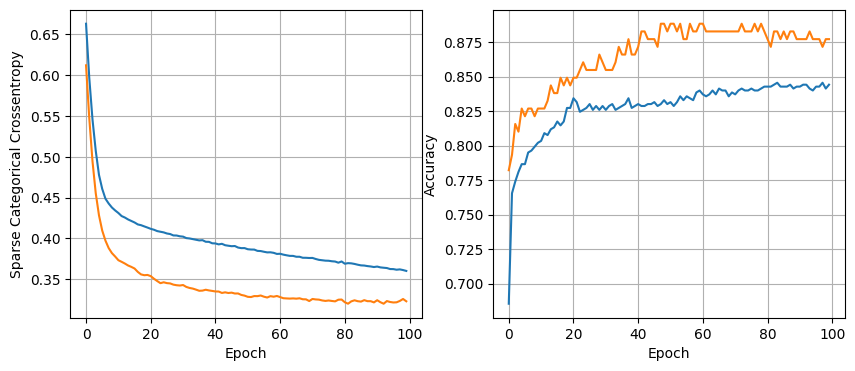

64 nodes, dropout 0.2, lr 0.01, batch size 32


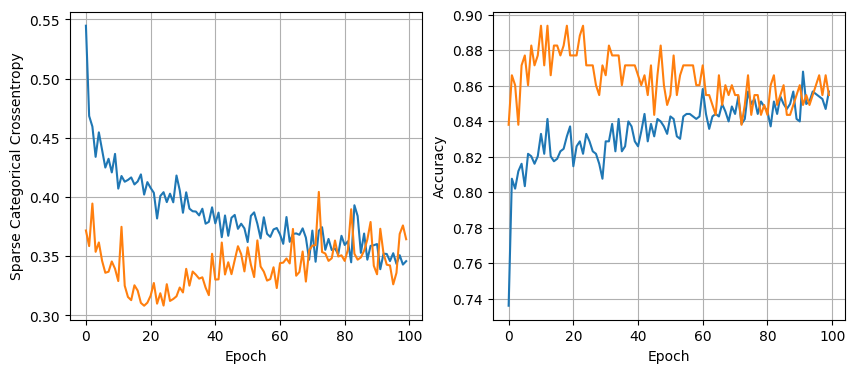

64 nodes, dropout 0.2, lr 0.01, batch size 64


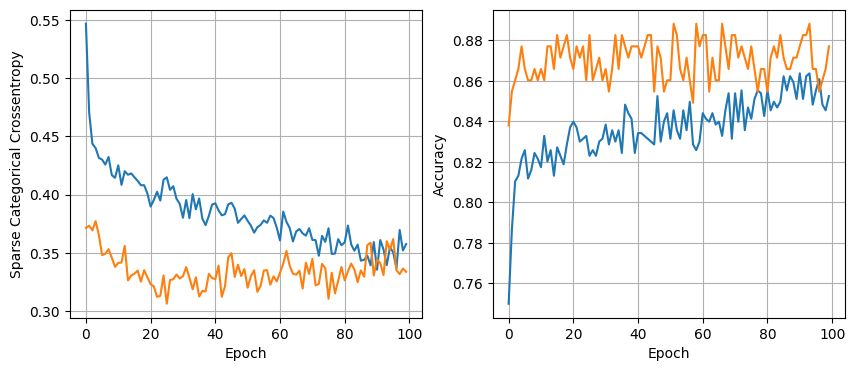

64 nodes, dropout 0.2, lr 0.01, batch size 128


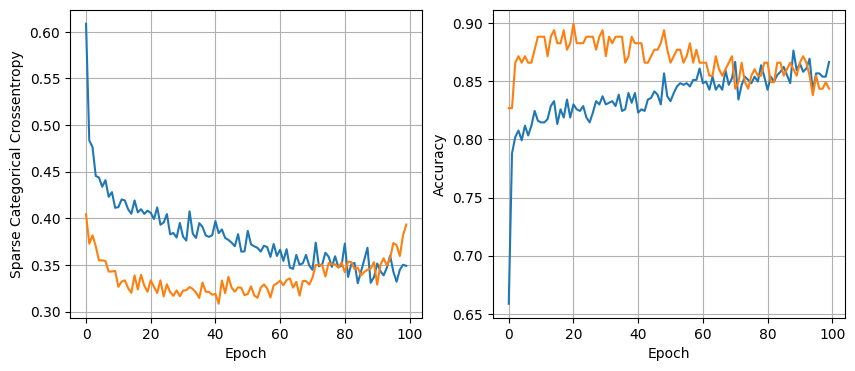

64 nodes, dropout 0.2, lr 0.005, batch size 32


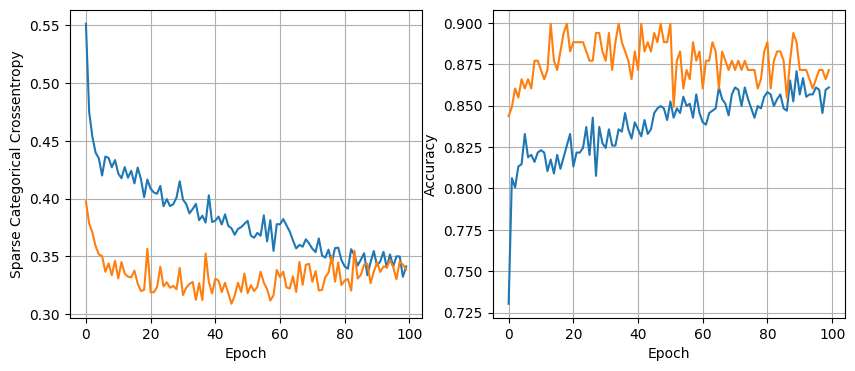

64 nodes, dropout 0.2, lr 0.005, batch size 64


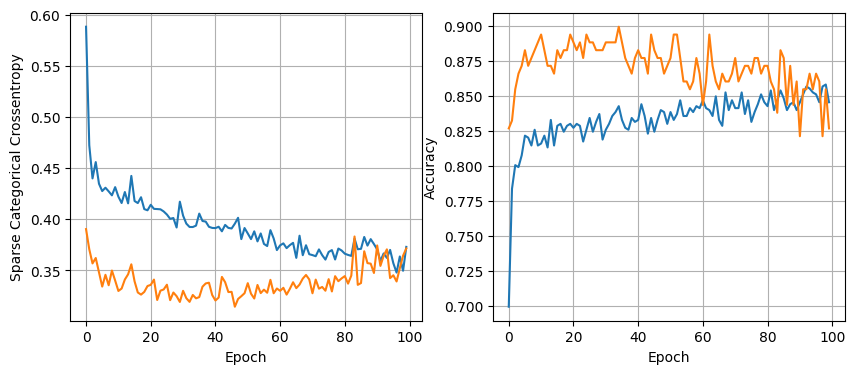

64 nodes, dropout 0.2, lr 0.005, batch size 128


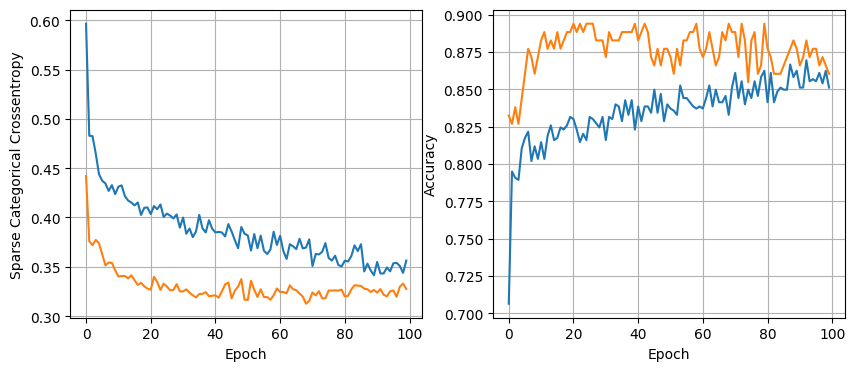

64 nodes, dropout 0.2, lr 0.001, batch size 32


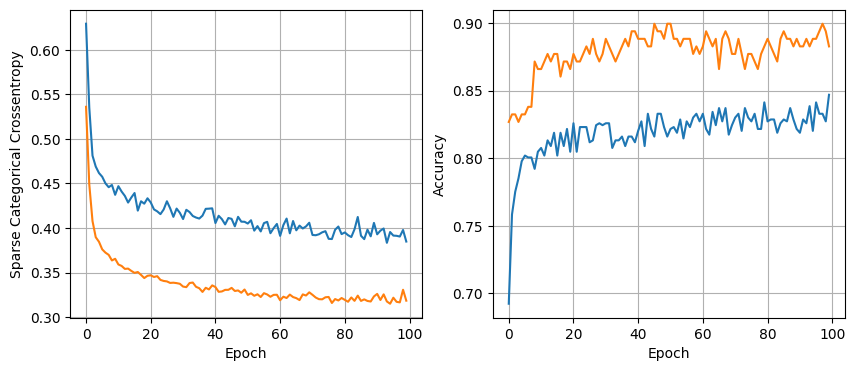

64 nodes, dropout 0.2, lr 0.001, batch size 64


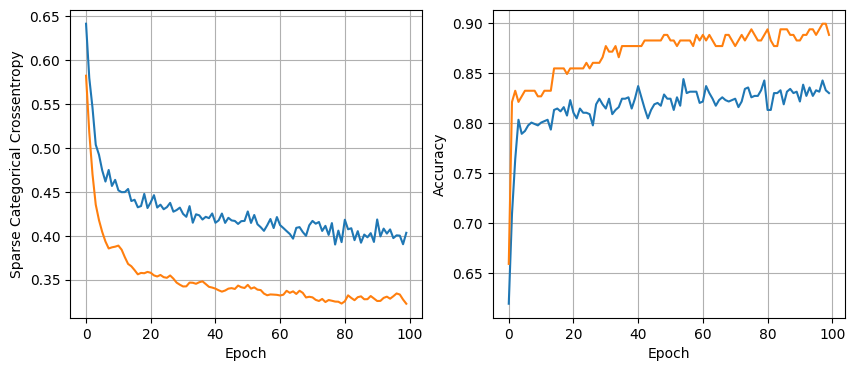

64 nodes, dropout 0.2, lr 0.001, batch size 128


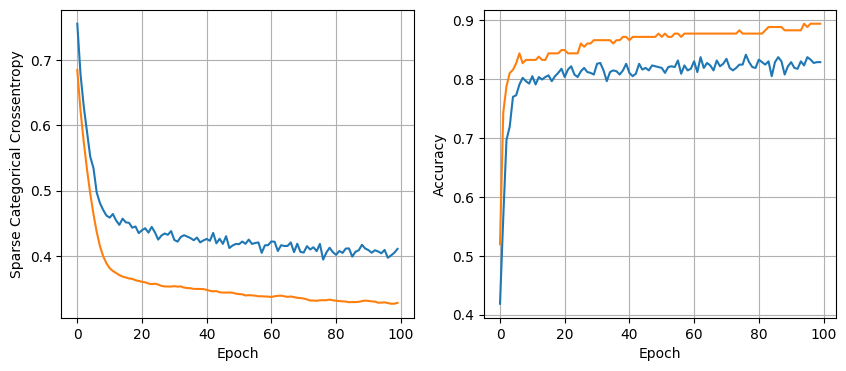

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")

                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)


In [ ]:
#32 nodes, dropout 0, lr 0.005, batch size 32
model, history = train_model(X_train, y_train, 32, 0, 0.005, 32, 100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, )

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       266
           1       0.80      0.84      0.82       152

    accuracy                           0.87       418
   macro avg       0.85      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418



#SUMMARY:
All models got pretty good results, KNN, Logistic Regression, Linear Regression and Naive Bayes got results over 90%, with the best one being Logistic Regression hitting 94%.

Random Forest and the NN hit under 90%, perhaps trying other parameters could benefit them and hit over 90%, but because we allready hit it with more simple models i didn't see a point to do so.

Decided to not oversample when i scaled the training dataset, even though there were much more results of 0 (didn't survive) than 1 (did survive). Maybe could have gotten better results oversampling in this case.